# Logistic Regression

## Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [15]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [23]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### our dataset is a base of customers information from a company selling cars.

### Depending on the independent variables, we would like to predict if a customer would or wouldn't buy a SUV (car)

## Split the inputs and outputs

### We want the Age and EstimatedSalary as our inputs and Purchased as our output respectively

In [63]:
# split here
Input = dataset.iloc[:, 2:4].values
output = dataset.iloc[:, -1].values

## Splitting into Train and Test sets

In [64]:
# Splitting the dataset into the Training set and Test set
# make the test set size 25%
Input_train, Input_test, output_train, output_test = train_test_split(Input, output, test_size=0.25)

## Scale the data using Standard Scaler. Note that you should use fit_transfrorm() for training and transform() for test sets

In [65]:
# Feature Scaling
standard_scaler = StandardScaler()
Input_train = standard_scaler.fit_transform(Input_train)
Input_test = standard_scaler.transform(Input_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Import the LogisticRegression class from sklearn.linear_model

In [66]:
from sklearn.linear_model import LogisticRegression

## Make a <u>classifier</u> object from LogisticRegrssion class with the following parameter: random_state = 0

In [67]:
classifer = LogisticRegression(random_state=0)

## Fir your train data into the classifier

In [68]:
i = classifer.fit(Input_train, output_train)
print(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Make a prediction on test data

In [69]:
# Predicting the Test set results
pr = classifer.predict(Input_test)


In [72]:
print(pr)

[1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


## Make a confusion matrix on y_test and y_pred. Import it from sklearn.metrics

In [73]:
# Import the library
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Make the Confusion Matrix
cm = metrics.confusion_matrix(output_test, pr)

### An example of confusion matrix.m

<img src="confusion_matrix2.png">

### Yours should look like the below one

In [74]:
print(cm)

[[62  4]
 [ 7 27]]


## For visualizing purposes we will choose meshgrid map from ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


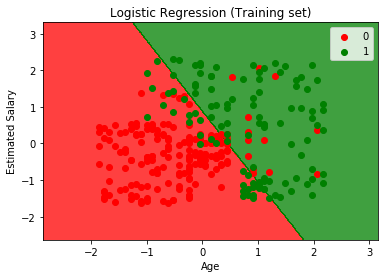

In [76]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = Input_train, output_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


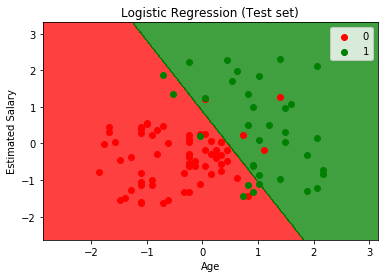

In [77]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = Input_test, output_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()